One of the global banks would like to understand what factors driving credit card spend are. The 
bank want use these insights to calculate credit limit. In order to solve the problem, the bank 
conducted survey of 5000 customers and collected data. 

#### The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants.

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [354]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [355]:
credit = pd.read_excel('D:/Analytix lab/case studies/regression case study/Data Set.xlsx')

In [356]:
output = pd.ExcelWriter('D:/Analytix lab/case studies/regression case study/Regression Output.xlsx')

In [357]:
print(credit.info())
print('_ _'*15)
print(credit.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB
None
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
(5000, 130)


In [358]:
credit.drop('custid', inplace = True, axis =1)

In [359]:
credit['total_spent']=credit['cardspent']+credit['card2spent']

In [360]:
import pandas_profiling as pp

In [361]:
#report = pp.ProfileReport(credit)

In [362]:
#report.to_file(output_file = 'profilereport_Credit_1.html')

In [363]:
credit.describe()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spent
count,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,4997.000000,5000.000000,5000.000000,2378.000000,5000.000000,2378.000000,5000.000000,5000.000000,1704.000000,5000.000000,1704.000000,5000.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.00000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,3.00140,2.687275,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,2.9326,0.147600,54.759600,3.699909,2.392200,9.954160,1.857326,-0.130454,3.654460,0.696915,0.23420,2.964200,0.480200,6.112800,0.641400,2.204000,3.067400,0.500400,0.392400,0.110400,0.055600,0.114600,0.046600,1.847400,0.62960,1.84260,16.402400,3.272000,2.130600,0.641400,0.343800,23.232580,1.389400,0.221000,0.361000,2.996200,1.973400,25.345538,0.679000,0.102600,0.271800,0.406000,0.274600,0.095400,0.123400,0.383800,0.058400,0.188000,7.636800,4.08860,0.381400,0.238400,0.518000,2.714200,2.507000,2.505800,0.189800,16.655800,3.782200,2.774400,2.541200,2.534000,0.187200,13.084400,3.571400,337.202520,160.876110,0.466000,2.05860,38.204800,0.253200,13.471450,2.288779,708.871753,5.611298,0.475600,13.264450,3.243230,577.832510,6.584783,0.340800,12.991310,3.600238,470.176400,6.747296,0.716200,15.443850,2.909733,720.478391,6.426309,0.26880,10.701190,3.605001,421.984610,6.808132,0.488400,0.303000,0.243600,1.199600,0.475200,0.479000,0.480600,0.478000,0.348600,0.983000,19.645000,0.915600,0.913600,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600,498.07863
std,1.42176,1.425925,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,1.4533,0.354739,55.377511,

In [364]:
cat_var = credit[['region','townsize','gender','agecat',
'birthmonth',
'edcat',
'jobcat',
'union',
'employ',
'empcat',
'retire',
'inccat',
'default',
'jobsat',
'marital',
'spousedcat',
'homeown',
'hometype',
'address',
'addresscat',
'cars',
'carown',
'cartype',
'carcatvalue',
'carbought',
'carbuy',
'commute',
'commutecat',
'commutecar',
'commutemotorcycle',
'commutecarpool',
'commutebus',
'commuterail',
'commutepublic',
'commutebike',
'commutewalk',
'commutenonmotor',
'telecommute',
'reason',
'polview',
'polparty',
'polcontrib',
'vote',
'card',
'cardtype',
'cardbenefit',
'cardfee',
'cardtenure',
'cardtenurecat',
'card2',
'card2type',
'card2benefit',
'card2fee',
'card2tenure',
'card2tenurecat',
'active',
'bfast',
'churn',
'tollfree',
'equip',
'callcard',
'wireless',
'multline',
'voice',
'pager',
'internet',
'callid',
'callwait',
'forward',
'confer',
'ebill',
'owntv',
'ownvcr',
'owndvd',
'owncd',
'ownpda',
'ownpc',
'ownipod',
'owngame',
'ownfax',
'news',
'response_01',
'response_02',
'response_03']]

#### converting Categorical var to object type

In [365]:
cat_var

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,January,1,1,0,24,5,0,5,0,1,0,-1,1,1,24,4,1,1,0,3,0,0,5,3,0,0,0,0,1,0,0,0,0,0,9,4,0,1,1,1,3,3,0,35,5,3,3,4,0,28,5,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
4996,3,3.0,0,5,May,2,1,0,6,3,0,4,1,5,0,-1,1,1,12,3,2,1,1,3,1,1,4,3,1,0,0,1,0,1,0,0,0,0,9,4,0,0,0,3,4,4,0,15,4,5,1,2,0,13,4,1,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0
4997,4,5.0,0,6,August,4,1,0,24,5,0,4,0,3,0,-1,1,3,48,5,3,1,0,3,1,0,1,1,1,0,1,1,0,0,0,1,0,0,9,4,0,0,0,1,3,1,0,40,5,2,4,4,0,29,5,0,3,0,1,0,1,0,1,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,0
4998,1,1.0,0,4,December,4,2,0,3,2,0,5,1,4,1,3,1,1,16,4,2,1,1,3,1,1,1,1,1,0,0,0,1,0,0,0,0,0,9,2,1,1,0,3,1,1,0,22,5,4,3,1,0,15,4,0,3,0,0,1,1,0,1,0,0,3,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,0,0,0


In [366]:
cat_var.dtypes

region           int64
townsize       float64
gender           int64
agecat           int64
birthmonth      object
                ...   
ownfax           int64
news             int64
response_01      int64
response_02      int64
response_03      int64
Length: 84, dtype: object

In [367]:
cat_var = cat_var.astype('object')
cat_var.dtypes

region         object
townsize       object
gender         object
agecat         object
birthmonth     object
                ...  
ownfax         object
news           object
response_01    object
response_02    object
response_03    object
Length: 84, dtype: object

In [368]:
num_var=[]
for i in credit.columns:
    if i not in cat_var:
        num_var.append(i)
print(num_var)

['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'cardspent', 'card2spent', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv', 'total_spent']


In [369]:
len(num_var)

46

In [370]:
num_var = credit[num_var]

In [371]:
num_var

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,cardspent,card2spent,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spent
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,81.66,67.80,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.10,4.837075,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,42.60,34.94,39,8.90,2.186051,330.60,5.800909,0.0,NaN,0.00,NaN,54.85,4.004602,1975.00,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,184.22,175.75,65,28.40,3.346389,1858.35,7.527444,0.0,NaN,0.00,NaN,0.00,NaN,0.00,NaN,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,340.99,18.42,36,6.00,1.791759,199.45,5.295564,0.0,NaN,0.00,NaN,0.00,NaN,0.00,NaN,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,255.10,252.73,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,NaN,0.00,NaN,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,1,4,4,0,0,0,0,0,0,64.5,21.0,872.11,553.56,69,34.10,3.529297,2405.90,7.785679,0.0,NaN,0.00,NaN,0.00,NaN,0.00,NaN,21.75,3.079614,1565.0,7.355641,0.00,NaN,0.00,NaN,19,1425.67
4996,51,14,83,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,1,1,0,0,0,0,0,0,1,40.0,26.0,210.81,155.54,30,10.40,2.341806,289.00,5.666427,36.5,3.597312,1157.20,7.053759,0.00,NaN,0.00,NaN,26.25,3.267666,800.0,6.684612,27.90,3.328627,757.35,6.629825,14,366.35
4997,75,17,108,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,1,0,0,0,0,0,0,0,0,53.6,32.0,884.08,643.67,72,29.40,3.380995,2109.25,7.654088,44.0,3.784190,3322.50,8.108473,0.00,NaN,0.00,NaN,15.25,2.724580,1070.0,6.975414,0.00,NaN,0.00,NaN,16,1527.75
4998,47,19,189,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,4,0,0,0,0,0,0,0,0,96.0,12.0,381.35,371.60,37,7.95,2.073172,282.70,5.644386,0.0,NaN,0.00,NaN,29.55,3.386084,1032.85,6.940077,9.50,2.251292,345.0,5.843544,0.00,NaN,0.00,NaN,24,752.95


#### Creating a  List to Contain all numerical variables and categorical variables as well

In [372]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [373]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [374]:
cat_var.apply(categorical_var_summary)

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
N,5000.00,4998.00,5000.00,5000.00,5000,5000.00,5000.0,5000.00,5000.00,5000.0,5000.00,5000.00,5000.00,5000.0,5000.00,5000.00,5000.00,5000.0,5000.0,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.0,5000.0,5000.0,5000.0,5000.00,5000.00,5000.0,5000.00,5000.00,5000.00,5000.00,5000.00,5000.0,5000.00,5000.00,5000.00,5000.00,5000.0,5000.00,5000.0,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.0,5000.0,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.0,5000.00,5000.00,5000.00,5000.0,5000.00,5000.0,5000.00,5000.0,5000.00,5000.00,5000.00,5000.0,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
NMISS,0.00,2.00,0.00,0.00,0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
MODE,5.00,1.00,1.00,4.00,September,2.00,2.0,0.00,0.00,2.0,0.00,2.00,0.00,3.0,0.00,-1.00,1.00,1.0,0.0,3.00,2.00,1.00,0.00,1.00,0.00,0.0,1.0,1.0,1.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,9.00,4.00,0.00,0.00,1.0,4.00,4.0,3.00,0.00,3.00,5.00,3.00,4.00,4.00,0.00,2.00,5.00,0.0,3.0,0.00,0.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,1.0,1.00,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
FREQ,1027.00,1436.00,2518.00,1222.00,458,1567.00,1640.0,4244.00,659.00,1180.0,4262.00,1797.00,3829.00,1085.0,2599.00,2599.00,3148.00,2265.0,245.0,1221.00,1607.00,3704.00,2287.00,2399.00,2901.00,3195.0,2855.0,2905.0,3395.0,4487.00,3641.00,2970.0,3627.00,4523.00,4383.00,3081.00,4708.00,4060.0,4052.00,1733.00,3093.00,3808.00,2590.0,1344.00,1260.0,1274.00,4051.00,246.00,2351.00,1384.00,1319.00,1294.00,4064.00,304.00,1923.00,2670.0,1875.0,3734.00,2622.00,3296.00,3581.00,3656.00,2558.00,3485.0,3782.00,2498.00,2624.00,2605.0,2597.00,2610.0,3257.00,4915.0,4578.00,4568.00,4664.00,3995.0,3164.00,2604.00,2626.00,4106.00,2637.00,4582.00,4351.00,4487.00
PERCENT,20.54,28.73,50.36,24.44,9.16,31.34,32.8,84.88,13.18,23.6,85.24,35.94,76.58,21.7,51.98,51.98,62.96,45.3,4.9,24.42,32.14,74.08,45.74,47.98,58.02,63.9,57.1,58.1,67.9,89.74,72.82,59.4,72.54,90.46,87.66,61.62,94.16,81.2,81.04,34.66,61.86,76.16,51.8,26.88,25.2,25.48,81.02,4.92,47.02,27.68,26.38,25.88,81.28,6.08,38.46,53.4,37.5,74.68,52.44,65.92,71.62,73.12,51.16,69.7,75.64,49.96,52.48,52.1,51.94,52.2,65.14,98.3,91.56,91.36,93.28,79.9,63.28,52.08,52.52,82.12,52.74,91.64,87.02,89.74


In [375]:
cat_summary = cat_var.apply(categorical_var_summary)

In [376]:
cat_summary.to_excel(output, ' cat_summary', index = True)

In [377]:
num_var.apply(continuous_var_summary)

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,cardspent,card2spent,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spent
N,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,4.997000e+03,4997.000000,5000.000000,2378.000000,5.000000e+03,2378.000000,5000.000000,1704.000000,5.000000e+03,1704.000000,5000.000000,3581.000000,4.998000e+03,3578.000000,5000.000000,1344.000000,5.000000e+03,1344.000000,5000.000000,5.000000e+03
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3.000000e+00,3.000000,0.000000,2622.000000,0.000000e+00,2622.000000,0.000000,3296.000000,0.000000e+00,3296.000000,0.000000,1419.000000,2.000000e+00,1422.000000,0.000000,3656.000000,0.000000e+00,3656.000000,0.000000,0.000000e+00
SUM,235128.000000,72715.000000,273798.000000,18499.546992,49770.800000,9286.628229,-652.137155,18272.300771,3483.879384,30564.000000,11020.000000,15337.000000,2502.000000,1962.000000,552.000000,278.000000,573.000000,233.000000,9237.000000,116162.900000,126677.000000,1.686013e+06,804380.550000,191024.000000,67357.250000,11443.895815,3.542232e+06,28039.655709,66322.250000,7712.400435,2.889163e+06,15658.614664,64956.550000,6134.804870,2.350882e+06,11497.393056,77219.250000,10419.752778,3.600951e+06,22993.332638,53505.950000,4845.120915,2.109923e+06,9150.129457,98225.000000,2.490393e+06
MEAN,47.025600,14.543000,54.759600,3.699909,9.954160,1.857326,-0.130454,3.654460,0.696915,6.112800,2.204000,3.067400,0.500400,0.392400,0.110400,0.055600,0.114600,0.046600,1.847400,23.232580,25.345538,3.372025e+02,160.876110,38.204800,13.471450,2.288779,7.088718e+02,5.611298,13.264450,3.243230,5.778325e+02,6.584783,12.991310,3.600238,4.701764e+02,6.747296,15.443850,2.909733,7.204784e+02,6.426309,10.701190,3.605001,4.219846e+02,6.808132,19.645000,4.980786e+02
MEDIAN,47.000000,14.000000,38.000000,3.637586,8.800000,0.926437,-0.076106,2.098540,0.741537,-1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.000000,2.763600e+02,125.340000,38.000000,9.550000,2.256541,3.500000e+02,5.857933,0.000000,3.228826,0.000000e+00,6.858013,0.000000,3.598681,0.000000e+00,7.050556,13.750000,2.904165,4.250000e+02,6.639876,0.000000,3.597997,0.000000e+00,7.147185,20.000000,4.142500e+02
STD,17.770338,3.281083,55.377511,0.747072,6.399783,3.415732,1.273058,5.395172,1.128578,7.743518,1.393977,3.414497,0.860783,0.796084,0.494227,0.325776,0.568798,0.469545,3.074801,21.231637,5.879149,2.451451e+02,146.292771,22.661888,12.773381,0.775178,9.792911e+02,1.649308,16.310018,0.404659,9.491516e+02,1.222040,19.212943,0.283385,9.122206e+02,1.199234,15.007569,0.564859,9.222255e+02,1.172050,19.799837,0.390102,1.001003e+03,1.283967,5.165609,3.515293e+02
VAR,315.784902,10.765504,3066.668742,0.558116,40.957226,11.667225,1.620678,29.107876,1.273689,59.962069,1.943173,11.658789,0.740948,0.633749,0.244261,0.106130,0.323532,0.220473,9.454404,450.782397,34.564390,6.009610e+04,21401.574779,513.561169,163.159266,0.600901,9.590110e+05,2.720218,266.016682,0.163749,9.008887e+05,1.493382,369.137163,0.080307,8.321465e+05,1.438161,225.227130,0.319066,8.504999e+05,1.373700,392.033527,0.152179,1.002008e+06,1.648571,26.683512,1.235728e+05
MIN,18.000000,6.000000,9.000000,2.197225,0.000000,0.000000,-6.597334,0.000000,-4.092107,-1.0000

In [378]:
num_var_miss = credit.loc[:, num_var.columns]
Missing_values=pd.DataFrame(num_var_miss.apply(continuous_var_summary).T.round(1)['NMISS']/5000*100)
M_V=Missing_values[Missing_values['NMISS']>25]
M_V

,NMISS
lntollmon,52.44
lntollten,52.44
lnequipmon,65.92
lnequipten,65.92
lncardmon,28.38
lncardten,28.44
lnwiremon,73.12
lnwireten,73.12


In [379]:
M_V.to_excel(output, 'High_Miss_Values', index=True)

In [380]:
num_var.drop(M_V.index,axis=1,inplace=True)

C:\Users\ragha\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [381]:
num_summary = num_var.apply(continuous_var_summary)

In [382]:
num_summary.to_excel(output,sheet_name = 'Numerical Variable Summary', index=True)

#### Creating Total spent from Dataframe

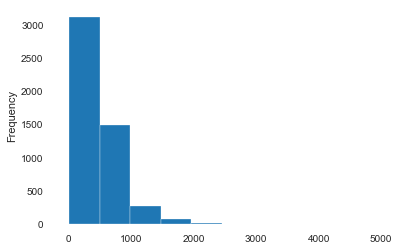

In [383]:
credit['total_spent'].plot(kind='hist')
plt.show()

it is hightly skewed, we need to transform it.

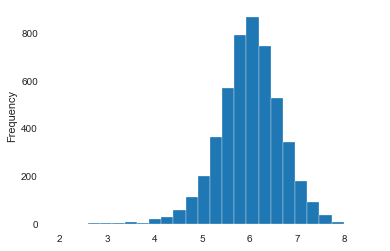

In [384]:
credit['total_spent_ln']=np.log(credit['total_spent'])
credit['total_spent_ln'].plot(kind='hist',bins=25)
plt.show()

In [385]:
credit.drop(['cardspent','card2spent'], inplace=True, axis =1)

In [386]:
num_var.drop(['cardspent','card2spent'], inplace=True, axis =1)

In [387]:
num_var['total_spent_ln'] = credit['total_spent_ln']

C:\Users\ragha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Missing Values Inspection


In [388]:
credit.isnull().sum().value_counts()

0       114
2         3
3296      2
3656      2
2622      2
3         2
1         2
1422      1
1419      1
dtype: int64

### Handling outliers

In [389]:
num_var = num_var.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))
num_var

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,total_spent,total_spent_ln
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.300,22.0,5,6.50,1.871802,34.40,3.538057,29.0,161.05,29.50,126.10,14.25,60.0,0.00,0.00,13,149.46,5.007029
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.800,29.0,39,8.90,2.186051,330.60,5.800909,0.0,0.00,54.85,1975.00,16.00,610.0,45.65,1683.55,18,77.54,4.350794
2,67,14,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.800,24.0,65,28.40,3.346389,1858.35,7.527444,0.0,0.00,0.00,0.00,23.00,1410.0,0.00,0.00,21,359.97,5.886021
3,23,16,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.700,38.0,36,6.00,1.791759,199.45,5.295564,0.0,0.00,0.00,0.00,21.00,685.0,0.00,0.00,26,359.41,5.884464
4,26,16,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.600,32.0,21,3.05,1.115142,74.10,4.305416,16.5,387.70,0.00,0.00,17.25,360.0,19.05,410.80,27,507.83,6.230147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196.0,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,1,4,3,0,0,0,0,0,0,64.500,21.0,69,34.10,3.529297,2405.90,7.785679,0.0,0.00,0.00,0.00,21.75,1565.0,0.00,0.00,19,1425.67,7.262397
4996,51,14,83.0,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,1,1,0,0,0,0,0,0,1,40.000,26.0,30,10.40,2.341806,289.00,5.666427,36.5,1157.20,0.00,0.00,26.25,800.0,27.90,757.35,14,366.35,5.903589
4997,75,17,108.0,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,1,0,0,0,0,0,0,0,0,53.600,32.0,72,29.40,3.380995,2109.25,7.654088,44.0,3322.50,0.00,0.00,15.25,1070.0,0.00,0.00,16,1527.75,7.331551
4998,47,19,189.0,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,4,0,0,0,0,0,0,0,0,92.001,13.0,37,7.95,2.073172,282.70,5.644386,0.0,0.00,29.55,1032.85,9.50,345.0,0.00,0.00,24,752.95,6.623999


In [390]:
credit.to_excel(output,'Outlier_Treatment',index=True)

In [391]:
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

num_var = num_var.apply(lambda x: Missing_imputation(x))

In [392]:
def Missing_imputation(x):
    x = x.fillna(x.mode())
    return x
cat_var = cat_var.apply(lambda x: Missing_imputation(x))

In [393]:
cat_var.townsize.fillna('ffill', inplace=True)

In [394]:
cat_var.to_excel(output,'categorical Missing Treated',index=True)

In [395]:
num_var.to_excel(output,'numerical Missing Treated',index=True)

In [396]:
corr = credit.corrwith(credit.total_spent_ln)

In [397]:
corr.sort_values(ascending=False).tail(30)

pets_small         0.001016
lncardmon          0.000904
cardtype           0.000332
commutewalk       -0.001709
card2benefit      -0.002814
active            -0.004236
commutepublic     -0.004273
telecommute       -0.004558
pets              -0.005655
cardfee           -0.007504
card2type         -0.008162
commute           -0.008262
carbought         -0.008395
pets_freshfish    -0.008617
jobcat            -0.009458
response_01       -0.010274
commutenonmotor   -0.012292
commuterail       -0.012617
commutebus        -0.012666
commutecat        -0.013322
hometype          -0.014810
reason            -0.015761
pets_birds        -0.016235
cardbenefit       -0.016799
card2fee          -0.018659
commutebike       -0.026103
card2             -0.075969
gender            -0.078351
retire            -0.200467
card              -0.232059
dtype: float64

In [398]:
corr1 =credit.corr()

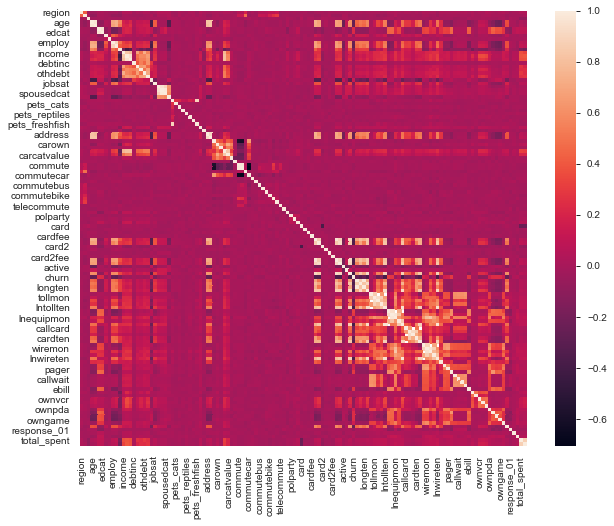

In [399]:
plt.figure(figsize = (10, 8))
heatmap = sns.heatmap(corr1)

In [400]:
corr1.to_excel(output,'heatmap',index=True)

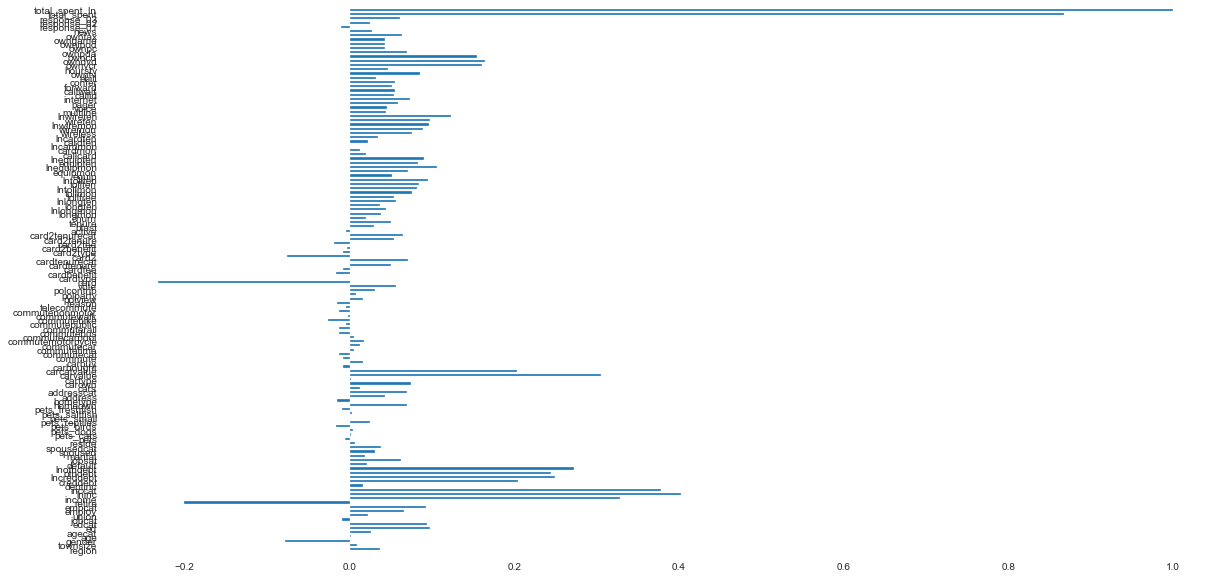

In [401]:
corr.plot(kind='barh', figsize = (20,10))

In [402]:
from time import strptime
def tomonth(x):
    month_number=strptime(x, '%B').tm_mon
    return month_number

credit['birthmonth']=credit['birthmonth'].map(lambda x: tomonth(x))

In [403]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname)
    col_dummies.drop(col_dummies.columns[0], axis = 1, inplace = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [404]:
cat_varlist = list(cat_var.columns)

In [405]:
for c_feature in cat_varlist:
    cat_var[c_feature] = cat_var[c_feature].astype('object')
    cat_var = create_dummies(cat_var,c_feature)
cat_var

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,townsize_ffill,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_

In [406]:
cat_var.to_excel(output,'Dummy creation',index=True)

In [407]:
cat_var.dtypes

region_2         uint8
region_3         uint8
region_4         uint8
region_5         uint8
townsize_2.0     uint8
                 ...  
ownfax_1         uint8
news_1           uint8
response_01_1    uint8
response_02_1    uint8
response_03_1    uint8
Length: 357, dtype: object

In [408]:
print(cat_var.info())
cat_var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 357 entries, region_2 to response_03_1
dtypes: uint8(357)
memory usage: 1.7 MB
None


,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,townsize_ffill,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_

In [409]:
print(num_var.info())
num_var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   ed              5000 non-null   int64  
 2   income          5000 non-null   float64
 3   lninc           5000 non-null   float64
 4   debtinc         5000 non-null   float64
 5   creddebt        5000 non-null   float64
 6   lncreddebt      5000 non-null   float64
 7   othdebt         5000 non-null   float64
 8   lnothdebt       5000 non-null   float64
 9   spoused         5000 non-null   int64  
 10  reside          5000 non-null   int64  
 11  pets            5000 non-null   int64  
 12  pets_cats       5000 non-null   int64  
 13  pets_dogs       5000 non-null   int64  
 14  pets_birds      5000 non-null   int64  
 15  pets_reptiles   5000 non-null   int64  
 16  pets_small      5000 non-null   int64  
 17  pets_saltfish   5000 non-null   i

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,total_spent,total_spent_ln
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.300,22.0,5,6.50,1.871802,34.40,3.538057,29.0,161.05,29.50,126.10,14.25,60.0,0.00,0.00,13,149.46,5.007029
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.800,29.0,39,8.90,2.186051,330.60,5.800909,0.0,0.00,54.85,1975.00,16.00,610.0,45.65,1683.55,18,77.54,4.350794
2,67,14,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.800,24.0,65,28.40,3.346389,1858.35,7.527444,0.0,0.00,0.00,0.00,23.00,1410.0,0.00,0.00,21,359.97,5.886021
3,23,16,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.700,38.0,36,6.00,1.791759,199.45,5.295564,0.0,0.00,0.00,0.00,21.00,685.0,0.00,0.00,26,359.41,5.884464
4,26,16,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.600,32.0,21,3.05,1.115142,74.10,4.305416,16.5,387.70,0.00,0.00,17.25,360.0,19.05,410.80,27,507.83,6.230147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196.0,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,1,4,3,0,0,0,0,0,0,64.500,21.0,69,34.10,3.529297,2405.90,7.785679,0.0,0.00,0.00,0.00,21.75,1565.0,0.00,0.00,19,1425.67,7.262397
4996,51,14,83.0,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,1,1,0,0,0,0,0,0,1,40.000,26.0,30,10.40,2.341806,289.00,5.666427,36.5,1157.20,0.00,0.00,26.25,800.0,27.90,757.35,14,366.35,5.903589
4997,75,17,108.0,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,1,0,0,0,0,0,0,0,0,53.600,32.0,72,29.40,3.380995,2109.25,7.654088,44.0,3322.50,0.00,0.00,15.25,1070.0,0.00,0.00,16,1527.75,7.331551
4998,47,19,189.0,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,4,0,0,0,0,0,0,0,0,92.001,13.0,37,7.95,2.073172,282.70,5.644386,0.0,0.00,29.55,1032.85,9.50,345.0,0.00,0.00,24,752.95,6.623999


In [410]:
credit_new = pd.concat([num_var, cat_var], axis=1)

In [411]:
credit_new.to_excel(output, 'credi_new', index =True) 

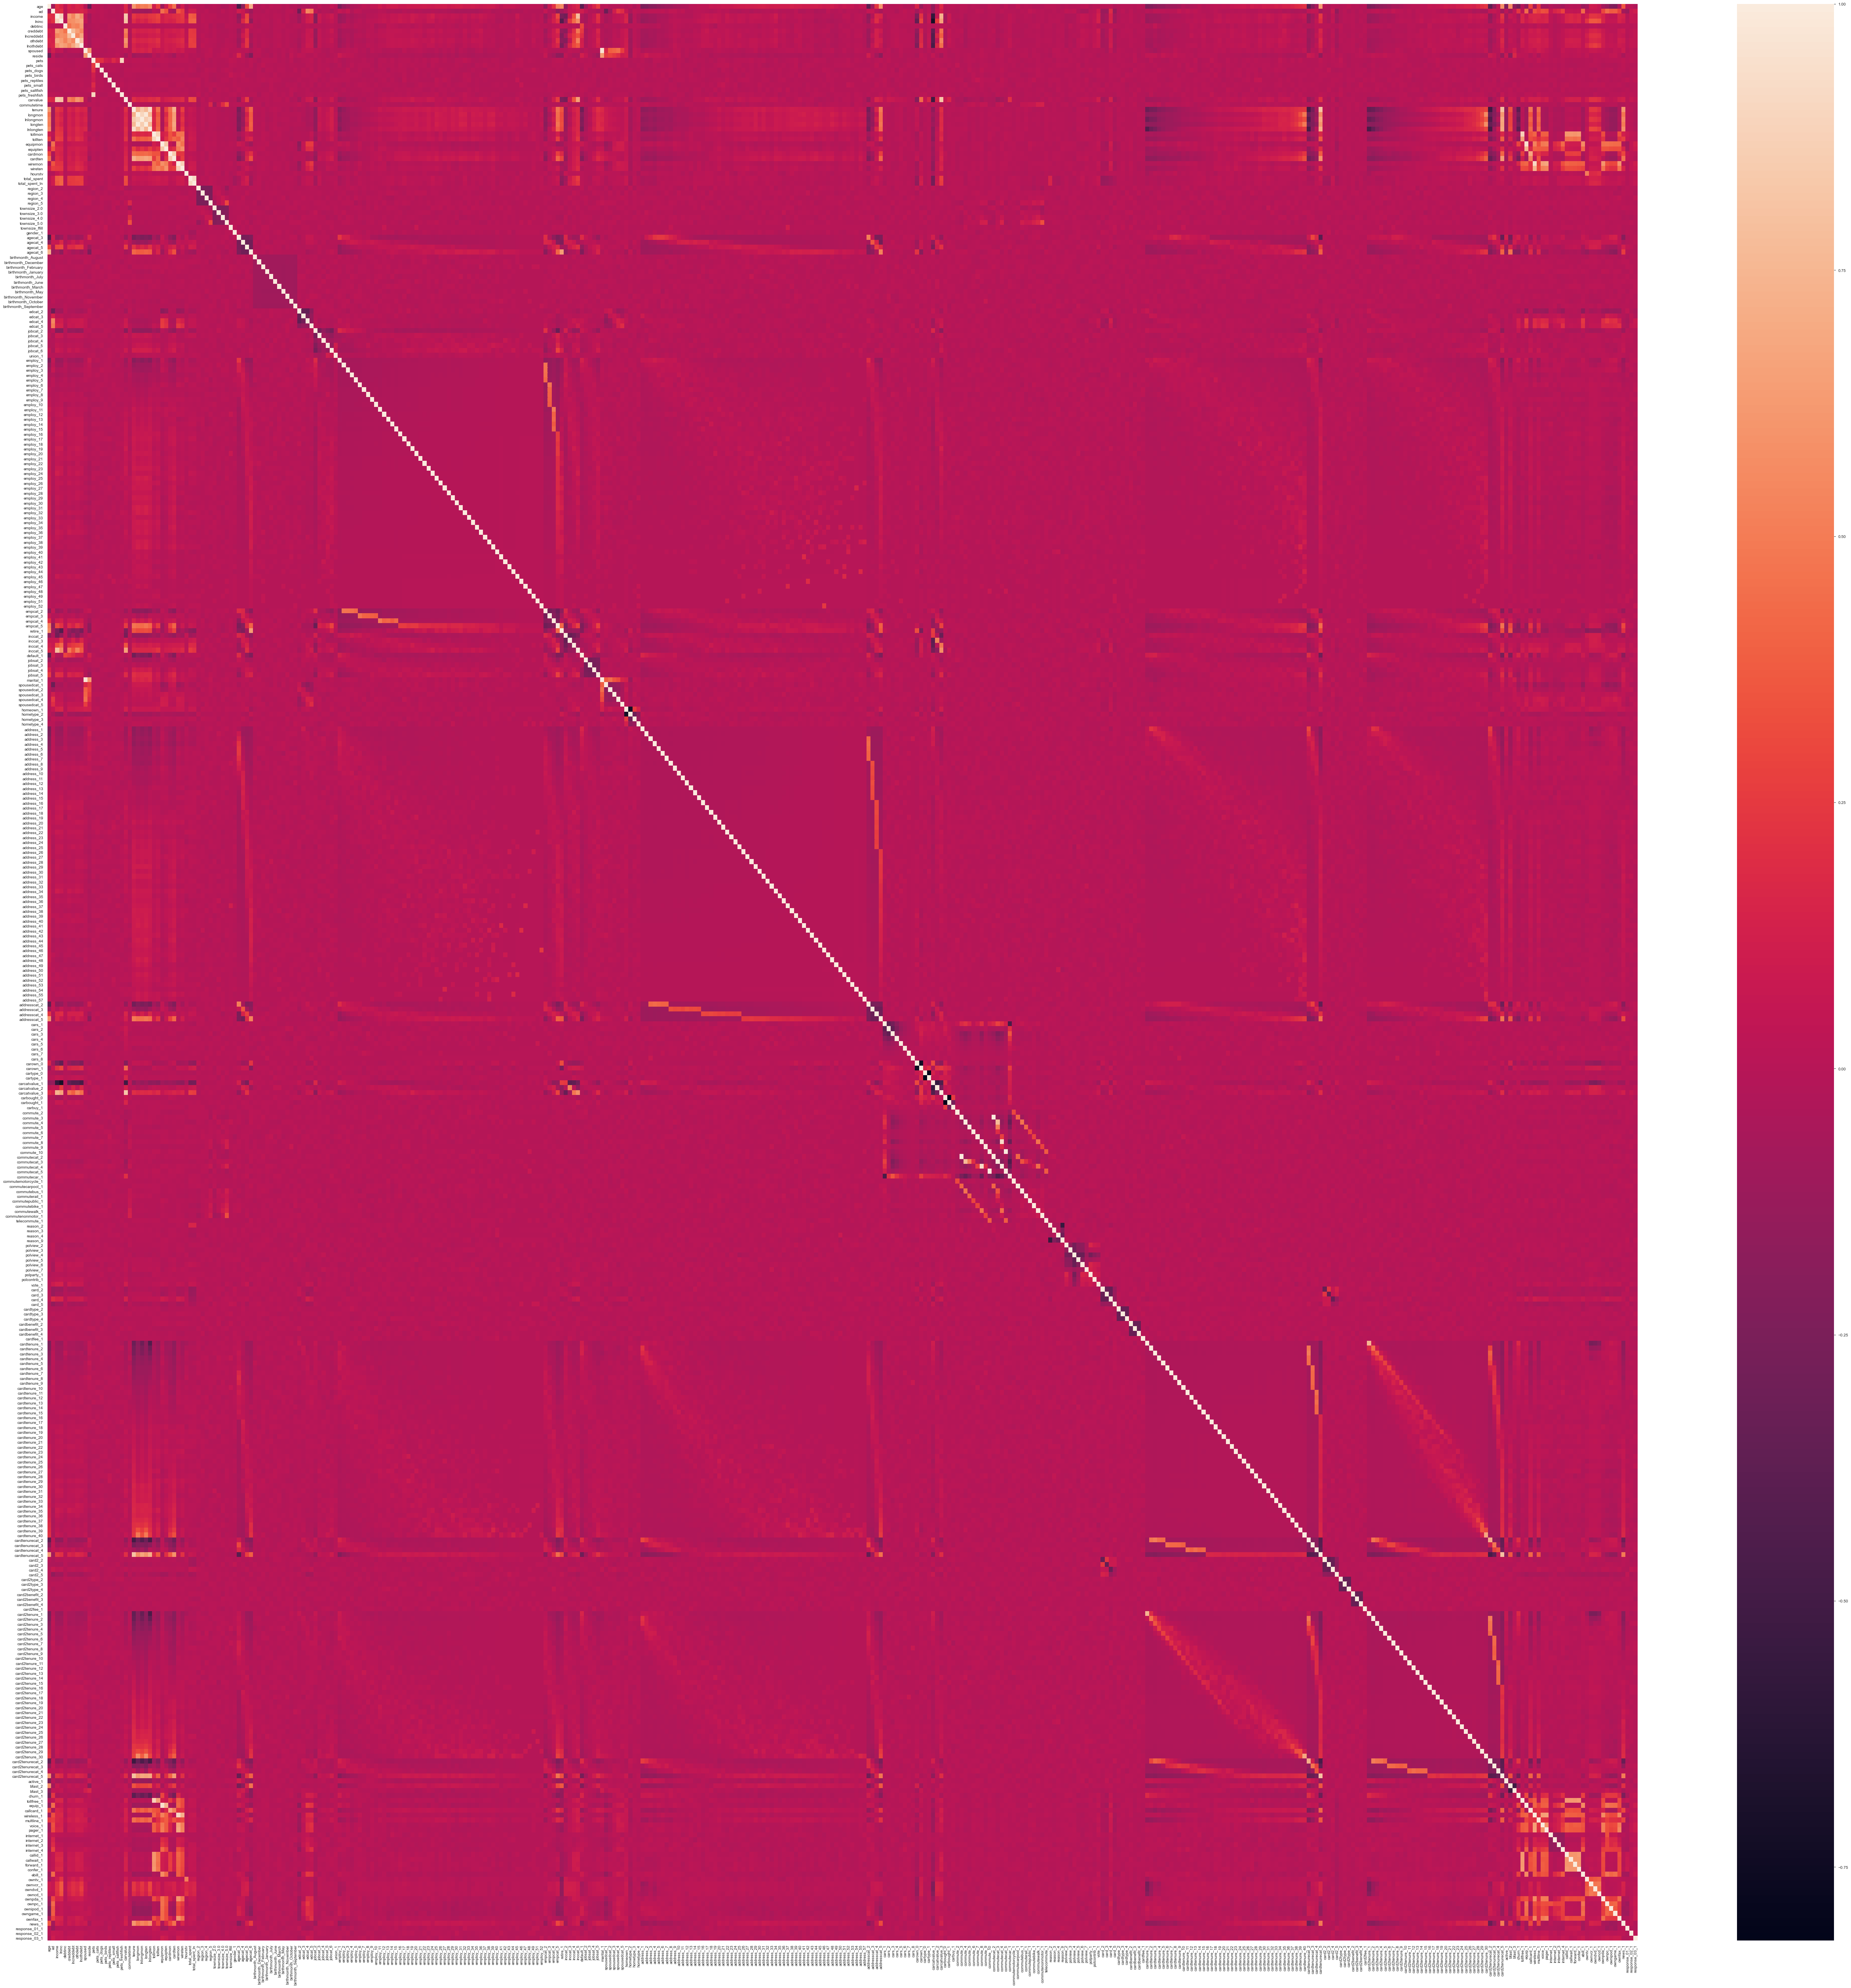

In [412]:
plt.figure(figsize = (90,90))
sns.heatmap(credit_new.corr())

In [413]:
corr_new = credit_new.corr()

In [414]:
corr_new.to_excel(output, 'credit_new corr', index = True)

credit_new.drop(['cardten','lncreddebt','lnothdebt','lnlongmon','lnlongten','lntollmon','lntollten',
'lnequipmon','lnequipten','lncardten','lnwiremon','lnwireten'],axis=1, inplace=True)

In [415]:
credit_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 394 entries, age to response_03_1
dtypes: float64(23), int64(14), uint8(357)
memory usage: 3.1 MB


In [416]:
from sklearn.model_selection import train_test_split

In [417]:
train, test = train_test_split(credit_new, test_size = 0.3, random_state = 12345)

In [418]:
# verify the no of obs in training and testing after split
print('No of obs in training: ', len(train), ' | ', 'No of obs in testing: ', len(test))

No of obs in training:  3500  |  No of obs in testing:  1500


In [419]:
train

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,total_spent,total_spent_ln,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,townsize_ffill,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26

In [420]:
target = credit_new['total_spent_ln']
target

0       5.007029
1       4.350794
2       5.886021
3       5.884464
4       6.230147
          ...   
4995    7.262397
4996    5.903589
4997    7.331551
4998    6.623999
4999    6.010924
Name: total_spent_ln, Length: 5000, dtype: float64

In [421]:
features = credit_new
features.drop('total_spent_ln', axis =1, inplace=True)

In [422]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  features, target )

In [423]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

In [424]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [425]:
f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

In [426]:
f_reg_results_new=f_reg_results[f_reg_results.P_Value<=0.1]
f_reg_results_new

,Variable,F_Value,P_Value
1,ed,48.542970,0.000
2,income,724.662079,0.000
3,lninc,979.942210,0.000
5,creddebt,287.876986,0.000
6,lncreddebt,341.471560,0.000
...,...,...,...
387,owngame_1,8.693023,0.003
388,ownfax_1,19.784973,0.000
389,news_1,4.459036,0.035
391,response_02_1,3.600705,0.058


In [427]:
f_reg_results_new.to_excel(output,'F_reg_results',index=True)

In [428]:
f_reg_results_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 1 to 392
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variable  148 non-null    object 
 1   F_Value   148 non-null    float64
 2   P_Value   148 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.6+ KB


In [429]:
f_columns = list(f_reg_results_new.Variable)

In [430]:
len(f_columns)

148

# VIF

In [431]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [432]:
model_param = 'total_spent_ln ~ ' + ' + '.join(f_columns)

In [433]:
model_param

'total_spent_ln ~ ed + income + lninc + creddebt + lncreddebt + othdebt + lnothdebt + spoused + carvalue + tenure + longmon + lnlongmon + longten + lnlongten + tollmon + tollten + equipmon + equipten + cardten + wiremon + wireten + hourstv + total_spent + region_5 + gender_1 + agecat_3 + agecat_4 + agecat_5 + agecat_6 + edcat_2 + edcat_4 + edcat_5 + jobcat_2 + jobcat_3 + employ_1 + employ_13 + employ_14 + employ_16 + employ_17 + employ_19 + employ_24 + employ_26 + employ_32 + employ_40 + empcat_4 + empcat_5 + retire_1 + inccat_2 + inccat_3 + inccat_4 + inccat_5 + jobsat_4 + jobsat_5 + spousedcat_1 + spousedcat_3 + spousedcat_4 + homeown_1 + hometype_2 + hometype_3 + address_1 + address_2 + address_3 + address_4 + address_14 + address_15 + address_18 + address_22 + address_28 + address_32 + addresscat_2 + addresscat_3 + addresscat_4 + cars_1 + carown_0 + carown_1 + cartype_0 + carcatvalue_1 + carcatvalue_2 + carcatvalue_3 + commute_4 + commutebike_1 + reason_2 + reason_3 + reason_4 + po

In [434]:
y, X = dmatrices(model_param, train, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the output
vif.round(1)
# High VIF of the variable means information in that variable has already been explained by 
# other X variables present in the model

C:\Users\ragha\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF Factor
0,Intercept,712.8
1,ed,4.2
2,income,23.0
3,lninc,38.8
4,creddebt,3.8
...,...,...
144,owngame_1,1.6
145,ownfax_1,1.8
146,news_1,1.7
147,response_02_1,1.1


In [435]:
round(vif.sort_values(by=['VIF Factor'], ascending= True),1).T

,109,83,81,44,147,84,25,43,82,24,148,100,42,87,69,88,99,98,41,118,68,67,97,34,73,80,76,59,117,66,86,40,38,39,65,64,35,116,52,85,37,130,114,96,36,53,115,30,95,54,92,113,94,62,63,22,123,33,111,131,143,108,144,112,55,23,61,140,146,139,60,56,142,138,127,141,145,137,136,45,122,8,128,132,134,105,57,133,58,89,135,72,129,106,90,32,107,31,91,19,120,71,47,46,70,4,5,1,110,6,26,7,48,119,124,27,93,28,49,29,18,126,121,50,16,21,51,9,103,102,101,125,15,2,20,10,14,12,3,104,17,13,11,0,78,77,75,79,74
Features,card2benefit_3,reason_3,commutebike_1,employ_40,response_02_1,reason_4,gender_1,employ_32,reason_2,region_5,response_03_1,cardtenure_31,employ_26,polcontrib_1,address_32,vote_1,cardtenure_29,cardtenure_21,employ_24,card2tenure_26,address_28,address_22,cardtenure_19,jobcat_3,cars_1,commute_4,cartype_0,hometype_3,card2tenure_20,address_18,polview_6,employ_19,employ_16,employ_17,address_15,address_14,employ_1,card2tenure_19,jobsat_4,polview_4,employ_14,internet_3,card2tenure_8,cardtenure_15,employ_13,jobsat_5,card2tenure_15,edcat_2,cardtenure_6,spousedcat_1,card_5,card2tenure_7,cardtenure_4,address_3,address_4,hourstv,bfast_3,jobcat_2,card2tenure_3,internet_4,ownipod_1,card2_5,owngame_1,card2tenure_4,spousedcat_3,total_spent,address_2,owncd_1,news_1,owndvd_1,address_1,spousedcat_4,ownpc_1,ownvcr_1,multline_1,ownpda_1,ownfax_1,owntv_1,ebill_1,empcat_4,bfast_2,spoused,voice_1,callid_1,forward_1,card2_2,homeown_1,callwait_1,hometype_2,card_2,confer_1,addresscat_4,pager_1,card2_3,card_3,edcat_5,card2_4,edcat_4,card_4,cardten,card2tenurecat_4,addresscat_3,retire_1,empcat_5,addresscat_2,creddebt,lncreddebt,ed,card2tenure_1,othdebt,agecat_3,lnothdebt,inccat_2,card2tenurecat_2,tollfree_1,agecat_4,cardtenure_1,agecat_5,inccat_3,agecat_6,equipten,wireless_1,card2tenurecat_5,inccat_4,tollten,wireten,inccat_5,carvalue,cardtenurecat_4,cardtenurecat_3,cardtenurecat_2,equip_1,tollmon,income,wiremon,tenure,lnlongten,lnlongmon,lninc,cardtenurecat_5,equipmon,longten,longmon,Intercept,carcatvalue_2,carcatvalue_1,carown_1,carcatvalue_3,carown_0
VIF Factor,1,1,1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.3,1.3,1.3,1.3,1.3,1.3,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.5,1.5,1.5,1.5,1.5,1.5,1.6,1.6,1.6,1.6,1.6,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.8,1.8,1.8,1.8,1.9,2,2,2.1,2.2,2.2,2.2,2.2,2.2,2.3,2.3,2.3,2.3,2.3,2.3,2.3,2.3,2.4,2.5,2.6,2.7,2.7,3,3.2,3.3,3.8,3.8,3.8,3.8,4.2,4.2,4.7,4.7,4.8,5.3,5.6,6.5,6.8,6.9,7.5,8.1,8.4,8.4,9,9.3,10.5,13.2,13.2,13.4,14.8,16.4,17.2,17.9,20.3,22.7,23,31.1,32.8,34.4,35.6,38.8,39.2,39.3,134.8,167.3,712.8,inf,inf,inf,inf,inf


In [436]:
round(vif.sort_values(by=['VIF Factor'], ascending= True),1).tail(45)

,Features,VIF Factor
70,addresscat_2,3.8
4,creddebt,3.8
5,lncreddebt,3.8
1,ed,4.2
110,card2tenure_1,4.2
6,othdebt,4.7
26,agecat_3,4.7
7,lnothdebt,4.8
48,inccat_2,5.3
119,card2tenurecat_2,5.6


In [437]:
vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Features    149 non-null    object 
 1   VIF Factor  149 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [438]:
vif.to_excel(output,'vif',index=True)

In [439]:
f_columns =vif[ vif['VIF Factor']<5.5]

In [440]:
len(f_columns)

113

In [441]:
f_columns.sort_values('VIF Factor', ascending=True).T

,109,83,81,44,147,84,25,43,82,24,148,100,42,87,69,88,99,98,41,118,68,67,97,34,73,80,76,59,117,66,86,40,38,39,65,64,35,116,52,85,37,130,114,96,36,53,115,30,95,54,92,113,94,62,63,22,123,33,111,131,143,108,144,112,55,23,61,140,146,139,60,56,142,138,127,141,145,137,136,45,122,8,128,132,134,105,57,133,58,89,135,72,129,106,90,32,107,31,91,19,120,71,47,46,70,4,5,1,110,6,26,7,48
Features,card2benefit_3,reason_3,commutebike_1,employ_40,response_02_1,reason_4,gender_1,employ_32,reason_2,region_5,response_03_1,cardtenure_31,employ_26,polcontrib_1,address_32,vote_1,cardtenure_29,cardtenure_21,employ_24,card2tenure_26,address_28,address_22,cardtenure_19,jobcat_3,cars_1,commute_4,cartype_0,hometype_3,card2tenure_20,address_18,polview_6,employ_19,employ_16,employ_17,address_15,address_14,employ_1,card2tenure_19,jobsat_4,polview_4,employ_14,internet_3,card2tenure_8,cardtenure_15,employ_13,jobsat_5,card2tenure_15,edcat_2,cardtenure_6,spousedcat_1,card_5,card2tenure_7,cardtenure_4,address_3,address_4,hourstv,bfast_3,jobcat_2,card2tenure_3,internet_4,ownipod_1,card2_5,owngame_1,card2tenure_4,spousedcat_3,total_spent,address_2,owncd_1,news_1,owndvd_1,address_1,spousedcat_4,ownpc_1,ownvcr_1,multline_1,ownpda_1,ownfax_1,owntv_1,ebill_1,empcat_4,bfast_2,spoused,voice_1,callid_1,forward_1,card2_2,homeown_1,callwait_1,hometype_2,card_2,confer_1,addresscat_4,pager_1,card2_3,card_3,edcat_5,card2_4,edcat_4,card_4,cardten,card2tenurecat_4,addresscat_3,retire_1,empcat_5,addresscat_2,creddebt,lncreddebt,ed,card2tenure_1,othdebt,agecat_3,lnothdebt,inccat_2
VIF Factor,1.03931,1.04466,1.04738,1.05306,1.05467,1.05518,1.05604,1.05962,1.06545,1.06552,1.06886,1.07213,1.0822,1.08223,1.09109,1.09894,1.10004,1.10245,1.10798,1.11562,1.11746,1.12816,1.13718,1.13974,1.14341,1.14653,1.14977,1.16144,1.16279,1.16434,1.16849,1.17346,1.18326,1.18558,1.1897,1.19355,1.19837,1.19928,1.20752,1.2137,1.24233,1.27581,1.3095,1.31363,1.31815,1.32228,1.3321,1.35242,1.36289,1.36301,1.36338,1.36871,1.38299,1.38446,1.39973,1.43762,1.47112,1.47403,1.52697,1.52927,1.53797,1.54013,1.56119,1.57116,1.57951,1.60572,1.63963,1.65719,1.66453,1.67426,1.67476,1.67783,1.72562,1.73859,1.7797,1.78676,1.7886,1.81895,1.87109,2.01477,2.04662,2.12889,2.17765,2.19499,2.21457,2.23008,2.24477,2.26666,2.27069,2.28273,2.2912,2.2986,2.31691,2.33249,2.33729,2.38553,2.47231,2.64444,2.66306,2.66698,2.95167,3.18456,3.29416,3.78929,3.79012,3.80635,3.83624,4.17786,4.19772,4.68606,4.7244,4.79138,5.2787


In [442]:
f_columns.to_excel(output,'features',index=True)

In [443]:
model_param = 'total_spent_ln ~ ' + ' + '.join(f_columns.Features)

In [444]:
import statsmodels.formula.api as smf

model_param = '''total_spent_ln ~ ed + creddebt + lncreddebt + othdebt + lnothdebt + spoused + cardten + lncardten + hourstv +
region_5 + gender_1 + agecat_3 + edcat_2 + edcat_4 + edcat_5 + jobcat_2 + jobcat_3 + employ_1 + employ_13 + employ_14 + 
employ_16 + employ_17 + employ_19 + employ_24 + employ_26 + employ_32 + employ_40 + empcat_4 + empcat_5 + retire_1 + 
inccat_2 + jobsat_4 + jobsat_5 + spousedcat_1 + spousedcat_3 + spousedcat_4 + homeown_1 + hometype_2 + hometype_3 + address_1 +
address_2 + address_3 + address_4 + address_14 + address_15 + address_18 + address_22 + address_28 + address_32 + 
addresscat_2 + addresscat_3 + addresscat_4 + cars_1 + cartype_0 + commute_4 + commutebike_1 + reason_2 + reason_3 +
reason_4 + polview_4 + polview_6 + polcontrib_1 + vote_1 + card_2 + card_3 + card_4 + card_5 + cardtenure_4 + 
cardtenure_6 + cardtenure_15 + cardtenure_19 + cardtenure_21 + cardtenure_29 + cardtenure_31 + card2_2 + card2_3+
card2_4 + card2_5 + card2benefit_3 + card2tenure_1 + card2tenure_3 + card2tenure_4 + card2tenure_7 + card2tenure_8+
card2tenure_15 + card2tenure_19 + card2tenure_20 + card2tenure_26 + card2tenurecat_4 + bfast_2 + bfast_3 +
multline_1 + voice_1 + pager_1 + internet_3 + internet_4 + callid_1 + callwait_1 + forward_1 + confer_1 + ebill_1 +
owntv_1 + ownvcr_1 + owndvd_1 + owncd_1 + ownpda_1 + ownpc_1 + ownipod_1 + owngame_1 + ownfax_1 + news_1 + response_02_1 +
response_03_1'''

In [445]:
model_param = '''total_spent_ln ~ creddebt + lnothdebt + region_5 + gender_1 + employ_14 + 
employ_26 + empcat_5 + retire_1 + card_2 + card_3 + card_4 + card_5 + card2_2 + card2_3
+ card2_4 + card2_5 + reason_2  + card2benefit_3'''

In [446]:
lm1= smf.ols(model_param, train).fit()

In [447]:
lol = lm1.summary()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         total_spent_ln   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     88.95
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          1.95e-269
Time:                        16:26:50   Log-Likelihood:                -2772.0
No. Observations:                3500   AIC:                             5582.
Df Residuals:                    3481   BIC:                             5699.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.8173      0.037    185.

In [448]:
#f=open('model Summary.csv','w')
#f.write(lm1.summary().as_csv())
#f.close()

In [449]:
train['pred_sales'] = np.exp(lm1.predict(train))

C:\Users\ragha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [450]:
test['pred_sales'] = np.exp(lm1.predict(test))

C:\Users\ragha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [451]:
train[['total_spent', 'pred_sales']].T

509        3847        3417        382         1345  \
total_spent  848.910000  613.91000  525.950000  331.380000  848.600000   
pred_sales   612.550834  642.71049  392.508181  315.132569  369.794492   

                    4000        2085         2902        3648        3271  \
total_spent  1740.900000  588.320000  1201.750000  977.290000  260.760000   
pred_sales    518.813706  318.969565  1188.284188  612.566292  282.936617   

                    4675        4526        1910         17          3181  \
total_spent   761.270000   77.870000  220.130000  1294.060000  256.380000   
pred_sales   1359.576305  280.540775  295.334615   630.613699  301.116395   

                  1982       2975        3236        222         386   \
total_spent  354.52000  549.90000  299.710000  454.100000  757.590000   
pred_sales   600.41478  364.91301  178.578393  522.929029  409.871285   

                  4531        4991       2921         656         3191  \
total_spent  857.61000  311.810000  337.31000  1457.000000  304.410000   
pred_sales   320.21624  366.895063  344.87041   576.160925  367.385245   

                   1204       1752         3229        1740        127   \
total_spent  267.550000  249.52000  1565.730000  596.180000  529.910000   
pred_sales   466.132527  180.01204   714.584063  558.075372  528.239594   

                  4298        1247        1087        4660        4192  \
total_spent  325.85000  132.940000  394.820000  460.980000  513.550000   
pred_sales   329.31676  357.823006  468.318959  397.586136  486.266368   

                   1881        1749        4532        150         3335  \
total_spent  386.660000  314.000000  282.640000  144.530000  191.200000   
pred_sales   313.287033  352.408593  280.523531  308.326852  224.722252   

                   2740        1736        3587        4390       2876  \
total_spent  147.030000  519.870000  285.420000  426.960000  310.08000   
pred_sales   285.076098  331.545814  275.029896  319.864034  289.68489   

                   3423        3361        1683        3158        2429  \
total_spent  339.210000  384.250000  619.780000  505.110000  747.940000   
pred_sales   348.531164  303.313297  305.941236  355.048115  335.029711   

                   685         717         2179       748         4391  \
total_spent  489.410000   72.870000  730.130000  184.05000  411.480000   
pred_sales   516.299796  251.103673  764.363449  355.01629  303.765348   

                   3400        810         4319        1319        2499  \
total_spent  438.500000  302.610000  218.110000  793.630000  299.230000   
pred_sales   589.771116  306.857847  286.672348  688.551439  364.253895   

                   2098       4710        3559        2668        1399  \
total_spent  387.300000  895.08000  313.360000  527.210000  285.430000   
pred_sales   609.587512  431.77989  272.070422  648.256593  301.138161   

                   4920        2348        4700        699         4723  \
total_spent  200.750000  153.240000  633.580000  345.910000  313.190000   
pred_sales   227.618543  382.541744  483.376467  404.090816  582.833425   

                   4080       667         500         2367        4711  \
total_spent  453.490000  1340.1200  217.210000  213.840000  392.610000   
pred_sales   472.559612   630.7836  307.726727  221.357602  366.017756   

                   4722        2728        4038        3317        301   \
total_spent  197.210000  218.210000   96.800000  921.300000  343.600000   
pred_sales   330.803947  477.725024  249.068858  776.515895  489.378089   

                   1815        4207        2140        555         3640  \
total_spent  374.330000  416.920000  468.450000  751.400000  456.100000   
pred_sales   244.997335  352.662963  321.588236  574.582889  272.750888   

                   4866        2352        1602        456         3410  \
total_spent  280.060000  536.620000  424.880000  767.420000  474.990000   
pred_sales   386.627162  371.376776  510.6

In [452]:
test[['total_spent','pred_sales']].T

,3183,1071,2640,2282,1595,4456,3352,3390,3431,298,136,2569,143,3356,1946,1557,2811,29,2449,191,2116,420,47,2003,4998,2510,2771,475,4438,1550,603,4356,4554,3972,4384,3978,3407,2349,3013,1380,1830,1241,1084,4370,3474,3072,1457,1818,4291,4263,4825,2488,4900,4471,1558,1744,1484,2219,4771,4418,4848,2407,1349,3778,2826,4692,1956,4686,3899,1178,698,255,751,1629,115,671,3644,1212,3221,753,2041,2515,1378,1456,1885,4944,3069,3345,379,24,2218,1031,1265,4476,4402,2777,415,1116,372,2556,3930,4960,166,648,4505,525,26,2679,552,442,1930,3242,4694,4929,2330,3964,2097,993,1453,735,4201,3362,2238,1013,4898,3801,1631,1706,1855,4119,4631,3850,226,4967,1650,302,101,837,3512,4495,2686,2166,4963,3761,1521,3043,1559,3594,4197,942,4607,3764,2205,3003,3767,3954,953,3591,1636,2657,4479,186,2471,3753,4323,3720,2643,3386,336,919,2502,4734,474,3016,3334,1995,1350,2671,2201,1499,323,33,3569,683,2808,139,2498,1371,4001,542,1167,3775,1215,1931,2588,432,1831,4383,4886,3449,28,3062,3886,3147,138,2769,906,400,2480,3098,4500,3724,345,4894,1091,3597,4983,967,2772,3614,3082,3247,4512,2383,4083,1128,674,1918,511,4484,485,1697,2913,154,81,2286,3086,2954,1971,4292,947,240,1480,2002,3280,3676,1929,1171,814,2652,95,423,1057,2080,3331,414,1433,3425,2422,3812,4085,4877,4012,2550,424,2537,2143,1394,2670,1780,4980,2788,2807,3538,2720,2010,2101,3102,763,3388,4895,4162,1802,2930,1770,3288,3987,2540,2018,4899,2104,4536,1667,986,3842,2277,4018,2241,665,2844,447,22,3094,3618,1032,3988,1387,2062,4420,3167,2608,2347,4776,4510,4822,1346,4266,2094,3897,2411,1935,4759,1048,2847,4932,3169,2235,3297,4458,332,2578,265,4212,4276,3746,3540,1993,1904,3196,270,457,2242,2465,1014,4959,1362,3901,2651,4672,4735,914,3123,4213,2741,1444,3651,4975,3220,987,895,873,1045,2396,3222,613,4595,2504,2466,4373,1601,3081,654,2013,1417,3696,964,3581,949,4242,4648,1640,3686,151,1269,4729,1035,1066,1676,2548,2660,3519,244,9,184,4764,709,4367,780,318,76,1513,4066,4088,2982,2943,898,3473,1372,2378,3550,4918,664,4042,4649,4280,4058,4436,1402,3055,2911,2680,2696,3213,2861,2998,4565,2115,1806,4275,869,2799,3030,3245,1612,4314,2798,3120,3262,4590,4914,251,4270,3997,3477,3719,2306,4996,1893,395,3647,3024,3438,4551,2202,3605,1661,3752,4704,51,121,3865,1472,2900,188,3563,4219,4746,271,2457,1590,3687,1627,4026,3036,1104,2178,2750,4909,2635,3160,4379,1725,2756,366,286,1244,1554,1580,1294,1948,675,2233,3702,1972,4159,1318,1874,4925,3707,2408,604,2060,4778,1363,954,2310,4105,2722,2999,2513,338,4806,135,3033,4863,2533,4223,391,2600,637,3603,1194,980,347,2048,3840,3625,2066,2031,725,4191,1859,3428,1255,2584,2414,4063,1901,4096,1321,4352,4745,3742,984,187,2920,3916,2298,2768,1672,1717,278,2416,2461,250,2949,1525,588,727,2559,362,3923,1569,1063,4927,1677,2897,3585,1658,523,3543,410,3875,680,1705,2386,1535,4254,4074,2438,2184,2685,941,2257,2517,3774,4178,2497,4656,3439,2051,2937,3643,3319,2708,4474,2420,2045,850,2351,3961,72,2173,335,2322,2462,2103,1782,971,2076,3729,1392,381,4025,1090,4457,4577,4693,3296,193,3965,3179,722,4753,623,617,2204,3616,1253,3963,1360,2365,1075,3608,3838,808,861,2833,2725,4966,3518,642,2634,3500,1313,2539,2516,1614,2297,2050,2758,4232,307,3216,822,622,1694,4635,2249,35,1213,44,3730,1086,1267,2967,1571,4689,284,4062,2214,2895,1046,1248,2983,4394,4911,3149,2852,3125,3260,2196,4676,3822,3411,4603,3484,4817,2456,4860,3780,1220,962,3224,1080,703,3745,638,3713,737,4453,392,4186,3957,4023,3826,4294,3980,1606,1361,296,1834,4060,4175,2460,4249,3021,531,2216,3592,92,4924,521,2185,2610,2603,4819,1246,2346,1625,3347,2863,116,1575,4185,1354,3189,716,1221,261,374,562,2560,1385,4332,3025,3067,4720,1049,2599,3418,2956,3230,2734,4682,4273,2868,694,4375,1258,4757,4557,4645,1774,145,2474,864,791,4893,4258,2492,2061,43,2,1250,128,2442,788,3051,3533,3690,3328,3315,974,178,2786,3731,380,3723,1581,1461,1836,1195,4869,2782,2754,4698,1594,4104,1010,2186,1097,2311,2448,1553,3682,3950,1838,3946,3336,2625,3277,4685,3330,1338,2345,459,4501,2733,4958,551,4244,1082,943,1415,605,1714,1915,2188,3576,1603,3116,1196,4761,1260,2618,1353

In [453]:
MAPE_train = np.mean(np.abs(train['total_spent'] - train['pred_sales'])/train['total_spent'])
MAPE_test = np.mean(np.abs(test['total_spent'] - test['pred_sales'])/test['total_spent'])

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.48107358913076276  |  MAPE of testing data:  0.5188899305331119


In [454]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [455]:
MSE_train = mean_squared_error(train.total_spent, train.pred_sales)
MSE_test = mean_squared_error(test.total_spent, test.pred_sales)

# print the values of MSE for train and test
print('MSE of training data: ', MSE_train,  ' | ', 'MSE of testing data: ', MSE_test)

# print the values of RMSE for train and test
print('RMSE of training data: ', np.sqrt(MSE_train),  ' | ', 
                              'RMSE of testing data: ', np.sqrt(MSE_test))

MSE of training data:  76083.5761581572  |  MSE of testing data:  78196.16102713732
RMSE of training data:  275.8325146862806  |  RMSE of testing data:  279.63576492848216


In [456]:
Corr_train = stats.stats.pearsonr(train.total_spent, train.pred_sales)
Corr_test = stats.stats.pearsonr(train.total_spent, train.pred_sales)

# print the values of Correlation for train and test
print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)

Correlation of training data:  (0.5621294112459483, 8.02979494681041e-291)  |  Correlation of testing data:  (0.5621294112459483, 8.02979494681041e-291)


In [457]:
validatoions = print('MSE_Train: ', MSE_train); print('MSE_test: ', MSE_test); print('RMSE of training data: ', np.sqrt(MSE_train));
print('RMSE of testing data: ', np.sqrt(MSE_test)); print('Correlation of training data: ', Corr_train); print('Correlation of testing data: ', Corr_test)

MSE_Train:  76083.5761581572
MSE_test:  78196.16102713732
RMSE of training data:  275.8325146862806
RMSE of testing data:  279.63576492848216
Correlation of training data:  (0.5621294112459483, 8.02979494681041e-291)
Correlation of testing data:  (0.5621294112459483, 8.02979494681041e-291)


In [458]:
# create the 10 groups in the data
train['Deciles'] = pd.qcut(train['pred_sales'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_sales'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_sales']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_sales']
Actual_avg = train[['Deciles', 'total_spent']].groupby(train.Deciles).mean().sort_index(ascending = False)['total_spent']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# Decile Analysis for test data
Predicted_avg = test[['Deciles', 'pred_sales']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_sales']
Actual_avg = test[['Deciles', 'total_spent']].groupby(test.Deciles).mean().sort_index(ascending = False)['total_spent']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

Decile_analysis_train.to_excel(output, 'Decile_analysis_train', index= True)
Decile_analysis_test.to_excel(output, 'Decile_train', index=True)

C:\Users\ragha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ragha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [459]:
print(Decile_analysis_test)
Decile_analysis_train

   Deciles  pred_sales  total_spent
0        9  788.009104   833.564477
1        8  620.103440   638.348448
2        7  524.876052   541.392267
3        6  454.658083   569.099483
4        5  395.275712   461.489883
5        4  354.657749   415.380101
6        3  331.558595   383.049984
7        2  311.668083   367.023651
8        1  288.707539   357.053435
9        0  240.888368   283.036789


,Deciles,pred_sales,total_spent
0,9,811.885513,903.219374
1,8,619.647514,704.146275
2,7,538.794265,601.552849
3,6,469.805124,519.419221
4,5,402.953174,454.144993
5,4,358.771774,435.050842
6,3,331.828589,380.115816
7,2,311.747295,357.010251
8,1,287.955849,334.890401
9,0,239.764828,281.194698


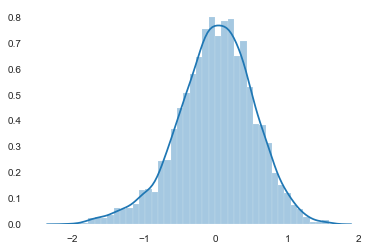

In [460]:
# assumption: Normality of the residuals/error (using distplot)
sns.distplot(lm1.resid)
plt.show()

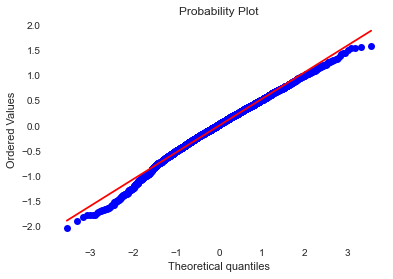

In [461]:
from scipy import stats
import pylab

stats.probplot(lm1.resid, dist = 'norm', plot = pylab)
pylab.show()


In [462]:
print(lm1.resid.mean())

5.774301671733286e-14


In [463]:
print(stats.stats.pearsonr(lm1.resid, train.total_spent))

(0.7206935296966234, 0.0)


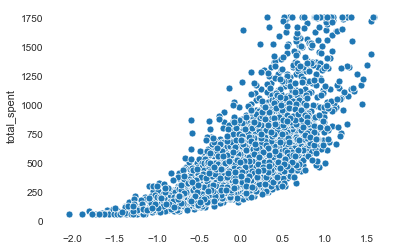

In [464]:
sns.scatterplot(lm1.resid, train.total_spent)

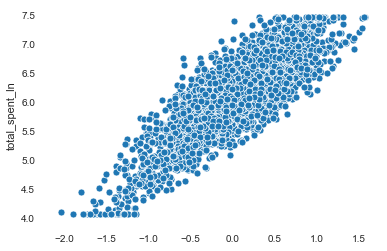

In [465]:
sns.scatterplot(lm1.resid, train.total_spent_ln)
plt.show()

In [466]:
output.save()

--------------------------------------------------------------------------------------------------END------------------------------------------------------------------------------------------------